In [70]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #{x_1, x_2, ...} x_scal_i = (x_i - mean(x)) / var(x)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV

# DataFrame № 1 💎

Будем решать задачу предсказания цены бриллианта в зависимости от его характеристик

https://www.kaggle.com/datasets/shivam2503/diamonds

In [71]:
data = pd.read_csv('diamonds.csv')

In [72]:
data.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [73]:
data.shape

(53940, 11)

✅ Есть ли в наборе данных пропущенные значения?

In [74]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [75]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


✅ Есть ли в наборе данных признаки, не несущие полезной информации?

In [76]:
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [77]:
data = data.drop("Unnamed: 0", axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


✅ Дополнительно происследуйте данные, которые кажутся интересными на ваш взгяд

Представим, что мы не владеем информацией о том, как устроены наши данные.

In [78]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [79]:
data["cut"].nunique()

5

In [80]:
data["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

✅ Исследуем вещественные признаки. Посмотрим на матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной.

- Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [82]:
data_corr = data.drop(['cut', 'color', 'clarity'], axis = 1)

In [83]:
data_corr.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

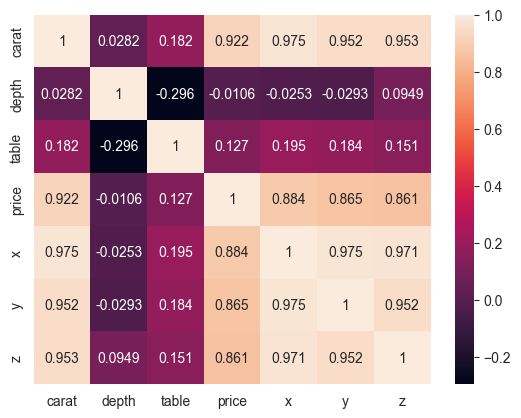

In [84]:
sns.heatmap(data_corr.corr(), annot = True, fmt = '.3g')

✅ Работаем с категориальными признаками. Закодируйте все категориальные признаки.

In [85]:
ohe = OneHotEncoder(sparse_output = True, drop = 'first')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [87]:
X_object = data.select_dtypes('object')
ohe.fit(X_object)

,categories,'auto'
,drop,'first'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [88]:
codes = ohe.transform(X_object).toarray()

In [89]:
codes

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(53940, 17))

In [90]:
feature_names = ohe.get_feature_names_out(['cut', 'color', 'clarity'])
feature_names

array(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], dtype=object)

In [91]:
data_coded = pd.concat([data.select_dtypes(exclude = 'object'), pd.DataFrame(codes,
                                                            columns=feature_names).astype(int)], axis = 1)

In [92]:
data_coded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


✅ Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [93]:
X = data_coded.drop('price', axis=1)
y = data['price']

In [94]:
np.random.seed(100)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [96]:
# train - 0.6-0.8
# valid - 0.1-0.2
# test - 0.1-0.2

model.train(X_train, y_train) -> #обучили, предсказали -> 0.9

a = [0, 0.1, 0.2, 0.3]
b = [0, 0.2, 0.5, 10]
mse_arr = {}
for a_i in a:
    for b_i in b:
        model.train(X_train, y_train, a_i, b_i)
        y_pred = model.predict(X_val)
        mse = mse(y_pred, y_val)
        mse_arr[(a_i, b_i)] = mse

min(mse_arr).key #-> a_bset, b_best на валидационной
model.train(X_train_best, y_train_best, a_hyp = a_best, b_hyp=b_best)

SyntaxError: invalid syntax (4201665974.py, line 5)

✅ Отмасштабируйте вещественные признаки. Объясните почему это необходимо?

In [51]:
scaler = StandardScaler()
scaler.fit(X_train) # mean, var
X_train = scaler.transform(X_train) # (x - mean) / var
X_test = scaler.transform(X_test) 

✅ Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
# y = kx + b

In [55]:
print('MSE train: ', (mean_squared_error(y_train, lin_reg.predict(X_train)))**0.5)
print('MSE test: ', mean_squared_error(y_test, lin_reg.predict(X_test))**0.5)
print('MAPE test: ', 100* mean_absolute_percentage_error(y_test, lin_reg.predict(X_test)))

MSE train:  1130.3690645928093
MSE test:  1129.595372864423
MAPE test:  38.19614098854275


✅ Выведите полученные оценки коэффициентов LinearRegression. Проанализируйте полученные коэффициенты.

In [56]:
coef_df = pd.DataFrame(lin_reg.coef_, index = X.columns, columns = ['coef'])
coef_df.sort_values(by=['coef'])

,coef
x,-1195.991585
color_J,-528.330025
color_I,-435.137333
color_H,-344.407503
color_G,-186.221178
color_F,-89.797141
depth,-88.907117
color_E,-76.597523
z,-61.815437
table,-55.797005


✅ Можно заметить из анализа корреляционной матрицы, что между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы мультиколлинеарности. 

Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. 

- Попробуйте провести регуляризацию модели, чтобы избавиться от данной проблемы: Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10.
- Сильно ли уменьшились веса?

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

In [57]:
lasso = linear_model.Lasso(alpha = 0.75) #лин модель с Л1 регуляризацией
lasso.fit(X_train, y_train)
print('MSE train lasso: ', mean_squared_error(y_train, lasso.predict(X_train))**0.5)
print('MSE test lasso: ', mean_squared_error(y_test, lasso.predict(X_test))**0.5)

MSE train lasso:  1130.5327044259443
MSE test lasso:  1129.3954088374069


MSE train:  113068118.91581373
MSE test:  111972473.27252065

In [58]:
ridge = linear_model.Ridge(alpha = 1) #лин модель с Л2 регуляризацией
ridge.fit(X_train, y_train)
print('MSE train ridge: ', mean_squared_error(y_train, ridge.predict(X_train))**0.5)
print('MSE test ridge: ', mean_squared_error(y_test, ridge.predict(X_test))**0.5)

MSE train ridge:  1130.3697025122462
MSE test ridge:  1129.563474059392


In [59]:
coef_df_lasso = pd.DataFrame(lasso.coef_, index = X.columns, columns = ['coef_lasso'])
coef_df_lasso.sort_values(by=['coef_lasso'])

,coef_lasso
x,-1155.443722
color_J,-523.731761
color_I,-429.658884
color_H,-338.878745
color_G,-180.337883
depth,-90.981710
color_F,-84.817427
color_E,-71.186453
table,-56.624064
z,-47.982900


In [60]:
coef_df_ridge = pd.DataFrame(ridge.coef_, index = X.columns, columns = ['coef_ridge'])
coef_df_ridge.sort_values(by=['coef_ridge'])

,coef_ridge
x,-1189.790266
color_J,-528.185880
color_I,-435.002045
color_H,-344.321876
color_G,-186.174649
color_F,-89.789290
depth,-88.500932
color_E,-76.556750
z,-63.671800
table,-55.810910


In [61]:
df = pd.concat([coef_df, coef_df_lasso, coef_df_ridge], axis = 1)
df

,coef,coef_lasso,coef_ridge
carat,5432.175375,5393.549804,5427.739062
depth,-88.907117,-90.981710,-88.500932
table,-55.797005,-56.624064,-55.810910
x,-1195.991585,-1155.443722,-1189.790266
y,19.544615,0.000000,19.428722
z,-61.815437,-47.982900,-63.671800
cut_Good,183.794211,174.735552,183.853238
cut_Ideal,442.993738,427.977223,443.110811
cut_Premium,362.190865,348.509624,362.285619
cut_Very Good,330.971111,318.575083,331.109954


✅ В зависимости от значения параметра  𝛼 в Lasso-регрессии зануляются разные оценки коэффициентов. Подберите оптимальное значение коэффициента регуляризации по тренировочной выборке.

In [62]:
alfas = [0.01, 0.1, 1, 10, 100]
lasso_euclid = []
ridge_euclid = []

In [63]:
print("Lasso Euclidean norms:")
print()
for i in alfas:
    lasso = linear_model.Lasso(alpha = i)
    lasso.fit(X_train, y_train)
    lasso_euclid.append(np.linalg.norm(lasso.coef_))
    
print(lasso_euclid)

print('----------')
print("Ridge Euclidean norms:")
print()

for i in alfas:
    ridge = linear_model.Ridge(alpha = i)
    ridge.fit(X_train, y_train)
    ridge_euclid.append(np.linalg.norm(ridge.coef_))
    
print(ridge_euclid)

Lasso Euclidean norms:

[np.float64(6767.622935378002), np.float64(6754.970571647847), np.float64(6628.757220417688), np.float64(5458.167367259892), np.float64(3889.8026502095436)]
----------
Ridge Euclidean norms:

[np.float64(6768.947622140579), np.float64(6768.221077272154), np.float64(6760.971537138329), np.float64(6690.017800226669), np.float64(6099.337342502797)]


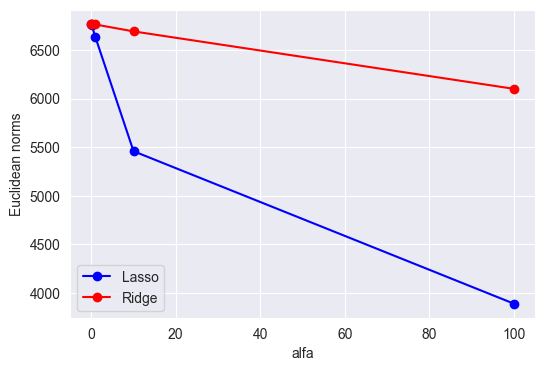

In [64]:
x = alfas
fig, ax = plt.subplots(figsize=(6,4))
y1 = lasso_euclid
y2 = ridge_euclid

#Lasso
ax.plot(x, y1, color = 'blue', marker = 'o', label = 'Lasso')

#Ridge
ax.plot(x, y2, color = 'red', marker = 'o', label = 'Ridge')

ax.grid(True)
plt.xlabel('alfa')
plt.ylabel('Euclidean norms')
leg = ax.legend(loc='lower left', frameon = True)

In [65]:
reg = LassoCV(cv = 5, n_alphas = 50, random_state = 0).fit(X_train, y_train)

reg_alph = reg.alphas_
array = reg.mse_path_

a=[]
for i in range(len(array)):
    m = np.mean(array[i])
    a.append(m)
    
d1 = {"MSE_1": pd.Series(a), "alpha_1": pd.Series(reg_alph)}
df1 = pd.DataFrame(d1)
print(df1)

           MSE_1      alpha_1
0   1.601656e+07  3693.830052
1   1.269508e+07  3208.133413
2   1.016602e+07  2786.300358
3   8.258316e+06  2419.933551
4   6.819309e+06  2101.739813
5   5.733847e+06  1825.384932
6   4.915068e+06  1585.367575
7   4.297451e+06  1376.909771
8   3.831575e+06  1195.861796
9   3.480157e+06  1038.619572
10  3.215077e+06   902.052911
11  3.015124e+06   783.443213
12  2.864296e+06   680.429341
13  2.750524e+06   590.960622
14  2.664703e+06   513.256021
15  2.599967e+06   445.768692
16  2.551136e+06   387.155179
17  2.465380e+06   336.248677
18  2.388077e+06   292.035800
19  2.300345e+06   253.636414
20  2.213850e+06   220.286110
21  2.122793e+06   191.320992
22  2.034203e+06   166.164458
23  1.949671e+06   144.315722
24  1.875138e+06   125.339846
25  1.813185e+06   108.859081
26  1.765865e+06    94.545350
27  1.729845e+06    82.113712
28  1.675669e+06    71.316693
29  1.638396e+06    61.939359
30  1.617449e+06    53.795038
31  1.600884e+06    46.721602
32  1.5857

/Users/igorkravchenko/dev/envs/pyVenvUniversal/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:1622: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


In [66]:
reg = LassoCV(cv = 5, alphas = alfas, random_state = 0).fit(X_train, y_train)

reg_alph = reg.alphas_
array = reg.mse_path_

a=[]
for i in range(len(array)):
    m = np.mean(array[i])
    a.append(m)
    
d2 = {"MSE_2": pd.Series(a), "alpha_2": pd.Series(reg_alph)}
print(np.argmin(d2["MSE_2"]))
df2 = pd.DataFrame(d2)
print(df2)

2
          MSE_2  alpha_2
0  1.783113e+06   100.00
1  1.344453e+06    10.00
2  1.283576e+06     1.00
3  1.284045e+06     0.10
4  1.284209e+06     0.01


✅ Обучите итоговую Lasso-регрессию с выбранным параметром  𝛼
  на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [67]:
lasso = linear_model.Lasso(alpha = 3.652240)
lasso.fit(X_train, y_train)
print('MSE train:', mean_squared_error(y_train, lasso.predict(X_train))**0.5)

MSE train: 1134.0102949173472


In [68]:
coef_df_lasso_CV = pd.DataFrame(lasso.coef_, index = X.columns, columns = ['coef_lasso_cv'])
coef_df_lasso_CV.sort_values(by=['coef_lasso_cv'])

,coef_lasso_cv
x,-1005.142202
color_J,-505.818804
color_I,-408.408455
color_H,-317.609108
color_G,-157.620961
depth,-90.769597
color_F,-65.611061
table,-59.393035
z,-53.978776
color_E,-50.313200


✅ Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии

In [69]:
print('MSE test:', mean_squared_error(y_test, lasso.predict(X_test))**0.5)

MSE test: 1131.9501740029807
